<a href="https://colab.research.google.com/github/MarcosRMG/Bootecamp-Alura-Data-Science/blob/main/M%C3%B3dulo_3_An%C3%A1lise_descritiva_e_testes_estat%C3%ADsticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

<font color=blue size=9>**Análise Descritiva e Teste Estatístico**</font>


---


Autor: Marcos Galvão

[Linkedin](https://br.linkedin.com/in/marcosrmgalvao)

[Github](https://github.com/MarcosRMG)

[Blog Jogando com Dados](https://jogandocomdados.blogspot.com/)

# **Bibliotecas**

In [ ]:
import pandas as pd
from zipfile import ZipFile
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from statsmodels.stats.weightstats import zconfint
from scipy.stats import normaltest
from scipy.stats import ranksums

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# **Dados**

##Lendo pelo google drive

In [ ]:
'''
caminho_drive = '/content/drive/MyDrive/Data Science/Alura/Bootcamp Data Science Aplicada/Módulo 3/PeNSE_2015_AMOSTRA2.zip'

zip = ZipFile(caminho_drive)
caminho_zip = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_zip), sep=';', decimal=',')

questionario_aluno_df = pd.read_excel('/content/drive/MyDrive/Data Science/Alura/Bootcamp Data Science Aplicada/Módulo 3/Dicionario_PENSE_Microdados_AMOSTRA2.xls')
'''

"\ncaminho_drive = '/content/drive/MyDrive/Data Science/Alura/Bootcamp Data Science Aplicada/Módulo 3/PeNSE_2015_AMOSTRA2.zip'\n\nzip = ZipFile(caminho_drive)\ncaminho_zip = zip.namelist()[1]\n\ndados = pd.read_csv(zip.open(caminho_zip), sep=';', decimal=',')\n\nquestionario_aluno_df = pd.read_excel('/content/drive/MyDrive/Data Science/Alura/Bootcamp Data Science Aplicada/Módulo 3/Dicionario_PENSE_Microdados_AMOSTRA2.xls')\n"

In [ ]:
#zip.namelist()[1]

In [ ]:
#dados.head()

In [ ]:
#dados.shape

In [ ]:
#dados.info()

##Lendo pelo GitHub

In [ ]:
amostra_aluno_escola = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/PENSE_AMOSTRA2_ALUNOESCOLA.CSV'  

dados = pd.read_csv(amostra_aluno_escola, sep=';', decimal=',')

dicionario = 'https://raw.githubusercontent.com/MarcosRMG/Bootecamp-Alura-Data-Science/main/data/Dicionario_PENSE_Microdados_AMOSTRA2.csv'

questionario_aluno_df = pd.read_csv(dicionario)

# **1 Educação, saúde e tipos de dados**

##Desafio 1.1 - Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash).

Utilizando o comando unzip e passando o endereço do arquivo zipado é possível fazer a descompactação. 

!unzip arquivo - descompacta
!unzip -l arquivo - mostra os arquivos dentro da pasta

In [ ]:
#Visualizacao
#! unzip -l drive/MyDrive/Data\ Science/Bootcamp/'Modulo 3'/PeNSE_2015_AMOSTRA2.zip

##Desafio 1.2 - Estudar sobre a base de dados que vamos trabalhar. (PeNSE - 2015 Amostra 2)

A Pesquisa Nacional de Saúde do Escolar - PeNSE é uma pesquisa por amostragem tendo como base o cadastro das escolas públicas e privadas do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira -  INEP. 
A coleta de dados é eventual e foi realizada nos anos de 2009, 2012 e 2015 por meio da parceria com o Ministério da Saúde e apoio do Ministério da Educação. 
A pesquisa tem como objetivo o fornecimento de informação para monitoramento por parte do Sistema de Vigilância de Fatores de Risco de Doênças Crônicas não Transmissíveis do Ministério da Saúde.

A segunda amostra referem-se a "dados passíveis de comparação com indicadores nacionais e internacionais sobre adolescentes e possibilita, entre outros aspectos, melhor identificação e acompanhamento de fatores relacionados ao desenvolvimento físico-biológico e ao tempo de exposição às condições de risco para esse grupo" (IBGE, 2020).

Amostra: "Escolares na faixa etária de 13 a 17 anos (frequentando as etapas do 6º ao 9º ano do ensino fundamental e da 1ª a 3ª série do ensino médio)" (IBGE, 2020).


Referência: IBGE. Pesquisa Nacional de Saúde do Escolar - PeNSE. Disponível em: https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e. Acesso em: 02 Dez. 2020.

##Desafio 1.3 - Classificar algumas perguntas como QualitativaXQuantitativa

In [ ]:
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VE01P14A04,VE01P14A05,VE01P14A06,VE01P14A07,VE01P14A08,VE01P14A09,VE01P14A10,VE01P14A11,VE01P49,VE01P50,VE01P51,VE01P52,VE01P53,VE01P54,VE01P55,VE01P56,VE01P57,VE01P58,VE01P25,VE01P59,VE01P60,VE01P61,VE01P62,VE01P63,VE01P64,VE01P65,VE01P66,VE01P67,VE01P26,VE01P27,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,5,1,1,2,2,-1,2,2,2,1,1,2,2,1,1,1,1,1,1,1,5,1,296


###Qualitativa

####Ordinal

In [ ]:
#Qual é o mês do seu aniversário?
dados['VB01004'].unique()

array([ 7,  4,  6,  9, 12,  3,  8,  5, 10,  1, 11,  2, 99])

Os números na questão VB01004 representam os meses do ano que seguem a ordenação padrão do calendário.

####Nominal

Sexo

In [ ]:
#Qual é o seu sexo?
dados['VB01001']

0        2
1        2
2        1
3        1
4        1
        ..
16551    2
16552    1
16553    1
16554    1
16555    1
Name: VB01001, Length: 16556, dtype: int64

Região Geografica

In [ ]:
dados['REGEOGR'].unique()

array([1, 2, 3, 4, 5])

São do tipo qualitativa nominal pois os números representam uma classificação (masculino e feminino, norte, sul) e a diferença numerica não é relavante, sendo utillizada por conveniência.

###Quantitativa

####Contínuo

In [ ]:
#Em que ano você nasceu?
dados['VB01005'].unique()

array([ 7,  6,  5,  8,  4, 10,  9,  3,  2,  1, 99])

A questao VB01005 e quantitativa continua por representar uma marcacao numerica sequencial.

####Discreto

In [ ]:
#Qual é a sua idade?
dados['VB01003'].unique()

array([13, 14, 15, 16, 11, 12, 17, 18, 19])

A questao VB01003 e quantitativa discreta por nao considrar o espaco de um aniversario e outro, como meses, dias, horas etc.

# **2 Dados qualitativos e tabelas de frequência**

##Desafio 2.1 - Criar uma função para gerar as tabelas de frequência e fazer a análise de outras informações. Compartilhar no discord suas análises

###Função

In [ ]:
def tabela_frequencia(dados: pd.DataFrame, titulo_eixo: str, 
                      dicionario_respostas: dict):
  frequencia = dados.value_counts()
  proporcao = round(dados.value_counts(normalize=True) * 100, 0).astype('int64')
  tabela = pd.DataFrame({
      'Frequência': frequencia,
      'Proporção (%)': proporcao
  })
  tabela.rename_axis(titulo_eixo, inplace=True)
  tabela.rename(index=dicionario_respostas, inplace=True)
  return tabela

In [ ]:
def tabela_frequencia_continuo(dados: pd.DataFrame, titulo_eixo: str):
  frequencia = dados.value_counts()
  proporcao = round(dados.value_counts(normalize=True) * 100, 0).astype('int64')
  tabela = pd.DataFrame({
      'Frequência': frequencia,
      'Proporção (%)': proporcao
  })
  tabela.rename_axis(titulo_eixo, inplace=True)
  return tabela

###Regiões

In [ ]:
dic_regioes = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}

In [ ]:
regioes = tabela_frequencia(dados['REGEOGR'], 'Respondentes por Região', dic_regioes)

In [ ]:
regioes

,Frequência,Proporção (%)
Respondentes por Região,,
Nordeste,3465,21
Centro-Oeste,3420,21
Sudeste,3276,20
Sul,3207,19
Norte,3188,19


### Possui Carro

In [ ]:
possui_carro = {
  1:	'Sim',
  2:	'Não',
  99:	'Não informado'
}

In [ ]:
carro = tabela_frequencia(dados['VB01017'], 'Possui Carro', possui_carro)

In [ ]:
carro

,Frequência,Proporção (%)
Possui Carro,,
Sim,10179,61
Não,6355,38
Não informado,22,0


###Fome

In [ ]:
ficou_fome = {
    1:	'Nunca',
    2:	'Raramente',
    3:	'Às vezes',
    4:	'Na maior parte das vezes',
    5:	'Sempre',
    99:	'Não informado'}

In [ ]:
ficou_fome_frequencia = tabela_frequencia(dados['VB02024'], 
                                          'Ficou com fome por falta de comida em casa',
                                          ficou_fome)

In [ ]:
ficou_fome_frequencia

,Frequência,Proporção (%)
Ficou com fome por falta de comida em casa,,
Nunca,12825,77
Raramente,1786,11
Às vezes,1443,9
Na maior parte das vezes,253,2
Sempre,219,1
Não informado,30,0


###Altura

In [ ]:
altura_dic = {
    0.998:	'Não informado',
    9.999:	'Recusa ou impossibilidade de medição'
}

In [ ]:
altura = tabela_frequencia(dados['VB17002'] / 1000, 'Altura (M)', altura_dic)

In [ ]:
altura

,Frequência,Proporção (%)
Altura (M),,
Não informado,385,2
Recusa ou impossibilidade de medição,265,2
1.6,186,1
1.62,153,1
1.57,146,1
...,...,...
1.176,1,0
0.142,1,0
1.22,1,0


In [ ]:
tabela_frequencia_continuo(dados['VB17004'] / 100, 'Altura (M)')

,Frequência,Proporção (%)
Altura (M),,
1.600,197,1
1.620,164,1
1.570,155,1
1.550,154,1
1.610,153,1
...,...,...
1.891,1,0
1.339,1,0
1.864,1,0


###Peso

In [ ]:
peso = tabela_frequencia_continuo(dados['VB17003'], 'Peso')

In [ ]:
peso

,Frequência,Proporção (%)
Peso,,
50.0,73,0
53.5,67,0
50.2,66,0
52.5,65,0
51.9,65,0
...,...,...
133.1,1,0
108.0,1,0
93.6,1,0


#Método cut

In [ ]:
dados['imc'] = round(dados['VB17003'] / (dados['VB17004'] / 100) ** 2, 2)

In [ ]:
dados['imc']

0        15.05
1        21.73
2        18.50
3        23.32
4        28.12
         ...  
16551    20.11
16552    17.93
16553    23.97
16554    19.00
16555    23.30
Name: imc, Length: 16556, dtype: float64

In [ ]:
classes_imc = [0, 16.99, 18.49, 24.99, 29.99, 34.99, 39.99, 60]
labels_imc = ['Muito abaixo do peso', 'Abaixo do peso', 'Peso normal', 
          'Acima do peso', 'Obesidade I', 'Obesidade II (severa)',
          'Obesidade III (móribida)']

dados['classificacao_imc'] = pd.cut(dados['imc'],
                                    labels=labels_imc,
                                    bins=classes_imc,
                                    include_lowest=True) 

In [ ]:
dados[['imc', 'classificacao_imc']]

,imc,classificacao_imc
0,15.05,Muito abaixo do peso
1,21.73,Peso normal
2,18.50,Peso normal
3,23.32,Peso normal
4,28.12,Acima do peso
...,...,...
16551,20.11,Peso normal
16552,17.93,Abaixo do peso
16553,23.97,Peso normal
16554,19.00,Peso normal


In [ ]:
frequencia_imc_classificacao = tabela_frequencia_continuo(dados['classificacao_imc'],
                                                 'Classificacao IMC')

In [ ]:
frequencia_imc_classificacao

,Frequência,Proporção (%)
Classificacao IMC,,
Peso normal,9192,56
Abaixo do peso,2559,15
Muito abaixo do peso,2409,15
Acima do peso,1762,11
Obesidade I,489,3
Obesidade II (severa),103,1
Obesidade III (móribida),42,0


# **3 Frequência em dados contínuos e pandas crosstab**

##Desafio 3.1 - Criar uma tabela de frequência para o peso seguindo a regra de Sturges.

In [ ]:
tamanho_amostra = len(dados)

k = int(1 + ((10/3) * np.log10(tamanho_amostra)))

dados['altura_classes'] = pd.cut(x=dados['VB17004'] / 100, bins=k)

frequencia_altura = tabela_frequencia_continuo(dados['altura_classes'], 
                                               'Altura (M)')

In [ ]:
frequencia_altura

,Frequência,Proporção (%)
Altura (M),,
"(1.573, 1.621]",3110,19
"(1.526, 1.573]",2734,17
"(1.621, 1.668]",2550,15
"(1.668, 1.716]",2063,12
"(1.478, 1.526]",1782,11
"(1.716, 1.763]",1416,9
"(1.431, 1.478]",1012,6
"(1.763, 1.811]",749,5
"(1.383, 1.431]",484,3


##Desafio 3.2 - Criar outros CrossTabs para analisar outras variáveis, além das abordadas em aulas. Pesquisar sobre o parâmetro aggfunc e testar em pelo menos uma tabela criada.

###Constrangimento com o questionário

In [ ]:
sim_nao = {
    1:	'Sim',
    2:	'Não',
    99: 'Não informado'
}

In [ ]:
constrangimento = tabela_frequencia(dados['VB16001A08'], 
                                    'Você achou este questionário constrangedor?',
                                    sim_nao) 

In [ ]:
constrangimento

,Frequência,Proporção (%)
Você achou este questionário constrangedor?,,
Não,16285,98
Sim,189,1
Não informado,82,0


In [ ]:
constrangimento_cruzado = round(pd.crosstab(dados['VB16001A08'], dados['VB01001'],
                                      normalize='columns') * 100, 0)
constrangimento_cruzado.rename(index=sim_nao, inplace=True)
constrangimento_cruzado.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
constrangimento_cruzado

VB01001,Masculino,Feminino
VB16001A08,,
Sim,1.0,1.0
Não,98.0,99.0
Não informado,1.0,0.0


In [ ]:
constrangimento_cruzado = round(pd.crosstab(dados['VB16001A08'], dados['VB01001'],
                                      normalize='index') * 100, 0)
constrangimento_cruzado.rename(index=sim_nao, inplace=True)
constrangimento_cruzado.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
constrangimento_cruzado

VB01001,Masculino,Feminino
VB16001A08,,
Sim,60.0,40.0
Não,50.0,50.0
Não informado,67.0,33.0


A normalização pode ser feita pela linha, pela coluna ou pela frequência total.

###Perspectiva

####Por sexo

In [ ]:
dic_perspectiva = {
    1:	'Somente continuar estudando',
    2:	'Somente trabalhar',
    3:	'Continuar estudando e trabalhar',
    4:	'Seguir outro plano',
    5:	'Não sei',
    99:	'Não informado'
}

In [ ]:
perspectiva_sexo = round(pd.crosstab(dados['VB01026'], dados['VB01001'], 
                               normalize='columns', colnames=['Sexo'],
                               rownames=['Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?']) * 100, 0)
perspectiva_sexo.rename(index=dic_perspectiva, inplace=True)
perspectiva_sexo.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
perspectiva_sexo

Sexo,Masculino,Feminino
"Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?",,
Somente continuar estudando,15.0,15.0
Somente trabalhar,9.0,5.0
Continuar estudando e trabalhar,61.0,69.0
Seguir outro plano,7.0,5.0
Não sei,8.0,6.0
Não informado,0.0,0.0


Para maioria de ambos os sexos a perspectiva é continuar estudando e trabalhar ou continuar estudando.

####Por Região

In [ ]:
perspectiva_regioes = round(pd.crosstab(dados['VB01026'], dados['REGEOGR'], 
                               normalize='columns', colnames=['Regiões'],
                               rownames=['Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?']) * 100, 0)
perspectiva_regioes.rename(index=dic_perspectiva, inplace=True)
perspectiva_regioes.rename(columns=dic_regioes, inplace=True)
perspectiva_regioes

Regiões,Norte,Nordeste,Sudeste,Sul,Centro-Oeste
"Quando terminar o ciclo/curso que você está frequentando atualmente, você pretende?",,,,,
Somente continuar estudando,17.0,17.0,13.0,11.0,16.0
Somente trabalhar,6.0,7.0,8.0,8.0,6.0
Continuar estudando e trabalhar,62.0,64.0,66.0,68.0,66.0
Seguir outro plano,7.0,6.0,6.0,5.0,6.0
Não sei,8.0,7.0,6.0,8.0,7.0
Não informado,0.0,0.0,0.0,0.0,0.0


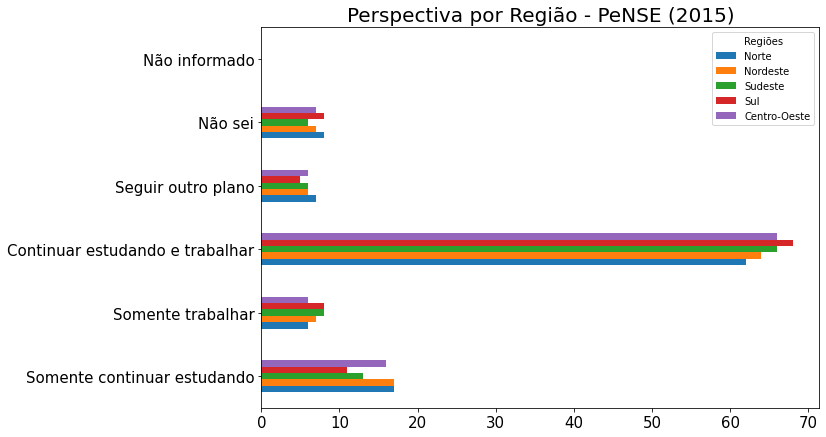

In [ ]:
perspectiva_regioes.plot(kind='barh', figsize=(10, 7), fontsize=15)
plt.ylabel('')
plt.title('Perspectiva por Região - PeNSE (2015)', fontsize=20)
plt.show()

####Pretensão de escolaridade

In [ ]:
dic_pretensao_escolaridade = {
1:	'Ensino Fundamental', 
2:	'Ensino Médio',
3:	'Ensino Médio Técnico',
4:	'Ensino Superior',
5:	'Pós-graduação',
6:	'Não sei',
99:	'Não informado'}

In [ ]:
pretensao_escolaridade = round(pd.crosstab(dados['VB01025'], dados['VB01001'], normalize='columns',
                  rownames=['Qual o grau de escolaridade mais elevado que você pretendo concluir?'],
                  colnames=['Sexo']
                  ) * 100, 0)

pretensao_escolaridade.rename(index=dic_pretensao_escolaridade, inplace=True)
pretensao_escolaridade.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
pretensao_escolaridade

Sexo,Masculino,Feminino
Qual o grau de escolaridade mais elevado que você pretendo concluir?,,
Ensino Fundamental,10.0,7.0
Ensino Médio,11.0,9.0
Ensino Médio Técnico,5.0,3.0
Ensino Superior,16.0,15.0
Pós-graduação,38.0,47.0
Não sei,21.0,19.0
Não informado,0.0,0.0


####Aggfunc - média da altura

In [ ]:
dic_idade = {
    11:	'11 anos ou menos',
    12:	'12 anos',
    13:	'13 anos',
    14:	'14 anos',
    15:	'15 anos',
    16:	'16 anos',
    17:	'17 anos',
    18:	'18 anos',
    19:	'19 anos ou mais'
}

In [ ]:
media_altura = round(pd.crosstab(dados['VB01003'], dados['VB01001'], 
                           values=dados['VB17004'], 
                           rownames=['Qual a sua idade?'], colnames=['Sexo'], 
                           aggfunc='mean') / 100, 2)

media_altura.rename(index=dic_idade, inplace=True)
media_altura.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
media_altura

Sexo,Masculino,Feminino
Qual a sua idade?,,
11 anos ou menos,1.48,1.50
12 anos,1.54,1.55
13 anos,1.61,1.58
14 anos,1.66,1.59
15 anos,1.70,1.61
16 anos,1.72,1.60
17 anos,1.74,1.61
18 anos,1.73,1.59
19 anos ou mais,1.72,1.59


####Cuidado com o peso

In [ ]:
dic_cuidado_peso = {
1:	'Não estou fazendo nada',
2:	'Estou tentando perder peso',
3:	'Estou tentando ganhar peso',
4:	'Estou tentando manter o mesmo peso',
99:	'Não informado'}

In [ ]:
cuidado_peso = pd.crosstab(dados['VB11002'], dados['VB01001'], 
                           values=dados['VB17003'], 
                           rownames=['O que você está fazendo em relação a seu peso?'], colnames=[''], 
                           aggfunc='mean')

cuidado_peso.rename(index=dic_cuidado_peso, inplace=True)
cuidado_peso.rename(columns={1: 'Masculino', 2: 'Feminino'}, inplace=True)
cuidado_peso

,Masculino,Feminino
O que você está fazendo em relação a seu peso?,,
Não estou fazendo nada,54.750124,50.273315
Estou tentando perder peso,65.585540,60.234523
Estou tentando ganhar peso,50.734544,44.402672
Estou tentando manter o mesmo peso,55.515322,50.064812
Não informado,54.348649,49.438182


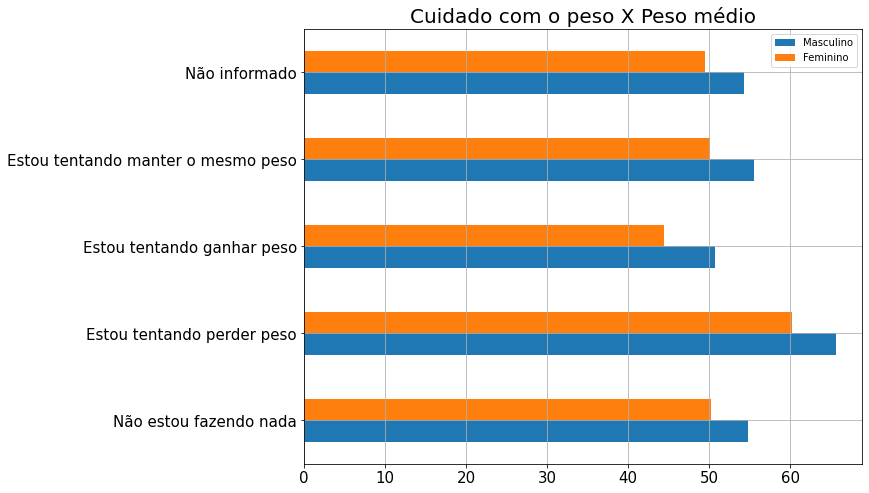

In [ ]:
cuidado_peso.plot(kind='barh', figsize=(10, 8), fontsize=15, grid=True)
plt.title('Cuidado com o peso X Peso médio', fontsize=20)
plt.ylabel('')
plt.show()

In [ ]:
comeu_fora = {
1:	'Não comi em restaurantes fast food nos últimos 7 dias (0 dia)',
2:	'1 dia nos últimos 7 dias',
3:	'2 dias nos últimos 7 dias',
4:	'3 dias nos últimos 7 dias',
5:	'4 dias nos últimos 7 dias',
6:	'5 dias nos últimos 7 dias',
7:	'6 dias nos últimos 7 dias',
8:	'Todos os dias nos últimos 7 dias',
99:	'Não informado'}

In [ ]:
comeu_fora_imc = round(pd.crosstab(dados['VB02023'], dados['classificacao_imc'],
                             normalize='columns',
                             rownames=['NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu em restaurantes fast food, tais como lanchonetes, barracas de cachorro quentes, pizzaria etc?']) * 100, 2)
comeu_fora_imc.rename(index=comeu_fora, inplace=True)
comeu_fora_imc

classificacao_imc,Muito abaixo do peso,Abaixo do peso,Peso normal,Acima do peso,Obesidade I,Obesidade II (severa),Obesidade III (móribida)
"NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu em restaurantes fast food, tais como lanchonetes, barracas de cachorro quentes, pizzaria etc?",,,,,,,
Não comi em restaurantes fast food nos últimos 7 dias (0 dia),54.55,53.18,50.92,55.33,60.12,63.11,59.52
1 dia nos últimos 7 dias,20.67,20.01,20.93,20.37,18.81,17.48,11.90
2 dias nos últimos 7 dias,10.09,10.59,11.71,11.01,10.43,8.74,9.52
3 dias nos últimos 7 dias,5.06,6.53,6.63,5.56,4.09,5.83,9.52
4 dias nos últimos 7 dias,3.07,3.44,3.47,2.61,3.07,2.91,4.76
5 dias nos últimos 7 dias,2.12,2.19,2.20,1.93,1.02,0.00,2.38
6 dias nos últimos 7 dias,1.45,1.29,1.52,1.19,1.02,0.00,2.38
Todos os dias nos últimos 7 dias,2.70,2.66,2.39,1.70,1.23,1.94,0.00
Não informado,0.29,0.12,0.23,0.28,0.20,0.00,0.00


In [ ]:
dic_auto_image = {
1:	'Muito satisfeito(a)',
2:	'Satisfeito(a)',
3:	'Indiferente',
4:	'Insatisfeito(a)',
5:	'Muito insatisfeito(a)',
99:	'Não informado'}

In [ ]:
auto_imagem = round(pd.crosstab(dados['VB11007'], dados['classificacao_imc'], 
                                normalize='index',
                                rownames=['Como você se sente em relação ao seu corpo?'],
                                colnames=['IMC']) * 100, 2)
auto_imagem.rename(index=dic_auto_image, inplace=True)
auto_imagem

IMC,Muito abaixo do peso,Abaixo do peso,Peso normal,Acima do peso,Obesidade I,Obesidade II (severa),Obesidade III (móribida)
Como você se sente em relação ao seu corpo?,,,,,,,
Muito satisfeito(a),19.94,18.68,53.47,6.45,1.24,0.13,0.09
Satisfeito(a),13.60,15.98,60.07,8.21,1.65,0.39,0.10
Indiferente,12.51,12.95,52.30,15.05,5.42,1.22,0.55
Insatisfeito(a),8.94,10.49,52.41,19.65,6.66,1.33,0.52
Muito insatisfeito(a),12.04,11.76,42.44,21.57,8.82,2.24,1.12
Não informado,16.02,16.57,57.46,7.73,1.10,0.55,0.55


# **4 Histograma e Boxplot**

##Desafio 4.1 - Calcular o desvio padrão, média, moda e mediana e plotar no gráfico de histograma.

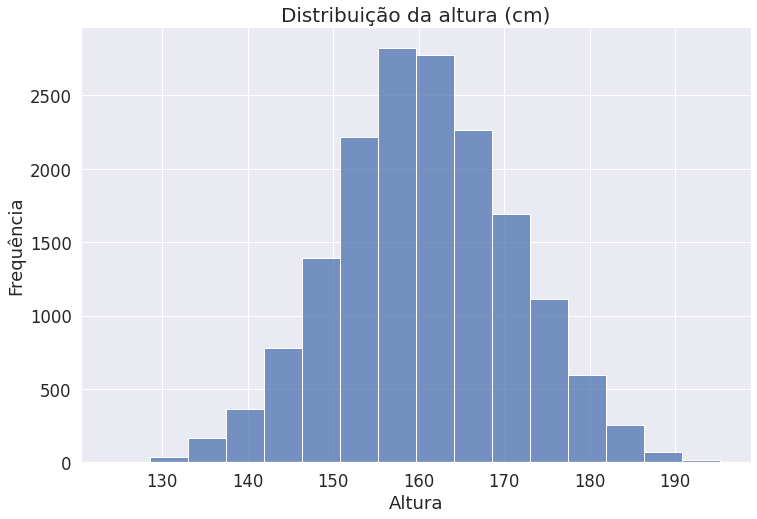

In [ ]:
sns.set(font_scale=1.5)
ax = sns.histplot(data=dados, x='VB17004', bins='sturges')
ax.figure.set_size_inches(12, 8)
ax.set_title('Distribuição da altura (cm)', fontsize=20)
ax.set_xlabel('Altura')
ax.set_ylabel('Frequência')
ax;

In [ ]:
dados['VB17004'].std() + dados['VB17004'].mean()

171.05318330461597

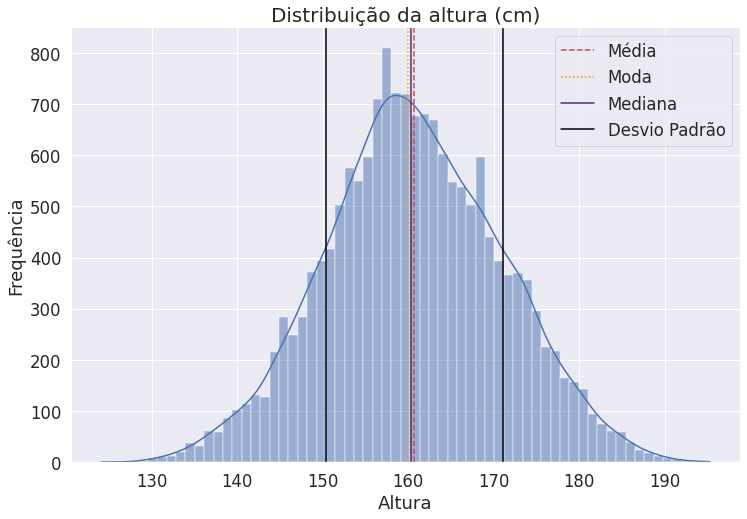

In [ ]:
sns.set(font_scale=1.5)
ax = sns.histplot(data=dados, x='VB17004', kde=True)
ax.figure.set_size_inches(12, 8)
ax.set_title('Distribuição da altura (cm)', fontsize=20)
ax.set_xlabel('Altura')
ax.set_ylabel('Frequência')
plt.axvline(x=dados['VB17004'].mean(), color='r', label='Média', linestyle='--')
plt.axvline(x=dados['VB17004'].mode().values, color='#ff9400', label='Moda', 
            linestyle=':')
plt.axvline(x=dados['VB17004'].median(), color='#552b70', label='Mediana')
plt.axvline(x=dados['VB17004'].std() + dados['VB17004'].mean(), color='#000000', 
            label='Desvio Padrão')
plt.axvline(x=dados['VB17004'].mean() - dados['VB17004'].std(), color='#000000')
plt.legend()
ax;

In [ ]:
fig_altura = go.Figure()

fig_altura.add_trace(go.Histogram(x=dados['VB17004']))


fig_altura.update_layout(title='Altura dos estudantes - PeNSE(2015)',
                         xaxis_title_text='Altura',
                         yaxis_title_text='Frequência')

fig_altura.add_trace(go.Line(name='Media', 
                             x=[dados['VB17004'].mean()]))

fig_altura.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig_altura_2 = px.histogram(dados, x='VB17004', title='Altura dos estudantes - PeNSE (2015)',
                            labels={'VB17004': 'Altura'})


fig_altura_2.update_layout(yaxis_title_text='Frequência')

fig_altura_2.add_trace(
    go.Scatter(
        x=[dados['VB17004'].mean(), dados['VB17004'].mean()],
        y=[0, 420],
        mode="lines",
        line=go.scatter.Line(color="black"),
        showlegend=True,
        name=f'Media {round(dados["VB17004"].mean(), 1)}'))

fig_altura_2.add_trace(
    go.Scatter(
        x=[dados['VB17004'].median(), dados['VB17004'].median()],
        y=[0, 420],
        mode="lines",
        line=go.scatter.Line(color="red"),
        showlegend=True,
        name=f'Mediana {round(dados["VB17004"].median(), 1)}'))

fig_altura_2.add_trace(
    go.Scatter(
        x=[float(dados["VB17004"].mode()), float(dados["VB17004"].mode())],
        y=[0, 420],
        mode="lines",
        line=go.scatter.Line(color="green"),
        showlegend=True,
        name=f'Moda {float(dados["VB17004"].mode())}'))

fig_altura_2.add_trace(
    go.Scatter(
        x=[dados['VB17004'].std() + dados['VB17004'].mean(), 
           dados['VB17004'].std() + dados['VB17004'].mean()],
        y=[0, 420],
        mode="lines",
        line=go.scatter.Line(color="yellow"),
        showlegend=True,
        name=f'Desvio Padrao {round(dados["VB17004"].std(), 1)}'))

fig_altura_2.add_trace(
    go.Scatter(
        x=[dados['VB17004'].mean() - dados['VB17004'].std(), 
           dados['VB17004'].mean() - dados['VB17004'].std()],
        y=[0, 420],
        mode="lines",
        line=go.scatter.Line(color="yellow"),
        showlegend=False,
        name='Desvio Padrao'))

fig_altura_2.show()

In [ ]:
float(dados["VB17004"].mode())

160.0

In [ ]:
dados["VB17004"].mean()

160.71311307078818

##Desafio 4.2 - Fazer a análise com o histograma para outras informações da base de dados.

In [ ]:
fig_peso = px.histogram(dados, x='VB17003', title='Peso dos estudantes - PeNSE (2015)',
                            labels={'VB17003': 'Peso (KG)'})


fig_peso.update_layout(yaxis_title_text='Frequência')

fig_peso.add_trace(
    go.Scatter(
        x=[dados['VB17003'].mean(), dados['VB17003'].mean()],
        y=[0, 600],
        mode="lines",
        line=go.scatter.Line(color="black"),
        showlegend=True,
        name=f'Media {round(dados["VB17003"].mean(), 2)}'))

fig_peso.add_trace(
    go.Scatter(
        x=[dados['VB17003'].median(), dados['VB17003'].median()],
        y=[0, 600],
        mode="lines",
        line=go.scatter.Line(color="red"),
        showlegend=True,
        name=f'Mediana {round(dados["VB17003"].median(), 2)}'))

fig_peso.add_trace(
    go.Scatter(
        x=[float(dados['VB17003'].mode()), float(dados['VB17003'].mode())],
        y=[0, 600],
        mode="lines",
        line=go.scatter.Line(color="green"),
        showlegend=True,
        name=f'Moda {float(dados["VB17003"].mode())}'))

fig_peso.add_trace(
    go.Scatter(
        x=[dados['VB17003'].std() + dados['VB17003'].mean(), 
           dados['VB17003'].std() + dados['VB17003'].mean()],
        y=[0, 600],
        mode="lines",
        line=go.scatter.Line(color="yellow"),
        showlegend=True,
        name=f'Desvio Padrao {round(dados["VB17003"].std(), 2)}'))

fig_peso.add_trace(
    go.Scatter(
        x=[dados['VB17003'].mean() - dados['VB17003'].std(), 
           dados['VB17003'].mean() - dados['VB17003'].std()],
        y=[0, 600],
        mode="lines",
        line=go.scatter.Line(color="yellow"),
        showlegend=False,
        name='Desvio Padrao'))

fig_peso.show()

##Desafio 4.3 - Pesquisar como é determinado os outliers no boxplot do seaborn. Calcular na mão utilizando a função .quantile()

O boxplot do Seaborn utiliza uma formula chamada [inter-quartile range](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=seaborn%20boxplot#seaborn.boxplot) para determinação dos outliers. 

In [ ]:
terceiro_quartil_altura = dados['VB17004'].quantile(0.75)
segundo_quartil_altura = dados['VB17004'].quantile(0.25)
intervalo_inter_quartil_altura = terceiro_quartil_altura - segundo_quartil_altura
intervalo_inter_quartil_altura

14.099999999999994

Outliers menores que a mediana:
E o segundo quartil menos o intervalo inter-quartil e meio.

Outliers maiores do que a mediana:
E o terceiro quartil mais o intervalo inter-quartil e meio.

In [ ]:
outlier_esquerdo = segundo_quartil_altura - 1.5 * intervalo_inter_quartil_altura
outlier_esquerdo

132.65000000000003

In [ ]:
outlier_direito = terceiro_quartil_altura + 1.5 * intervalo_inter_quartil_altura
outlier_direito

189.05

As alturas menores do que 132.65 centimetros e maiores do que 189.05 centimetros sao consideradas outliers.

In [ ]:
dados['VB17004'].min()

124.1

In [ ]:
dados['VB17004'].max()

195.3

# **5 Medidas de centralidade e dispersão**

As medidas de centralidade são:

Média: Soma dos elementos dividido pelo número de elementos de uma frequência.

Mediana: Numero que divide a frequencia no meio, ficando 50% menores do que a mediana e 50% maiores.

Desvio padrão: Número que representa o quanto a distribuição de frequência se dispersa da média, quanto maior o desvio padrão maior a dispersão da frequência.

Quartil: Divisão da distrbuição  de frequência em quatro partes, 25% dos dados e o primeiro quartil, 75% dos dados representam o terceiro quartil.

##Desafio 5.1 - Fazer a descrição de outras variáveis, analisar e compartilhas suas análises no discord.

In [ ]:
dados['VB01003'].describe()

count    16556.000000
mean        14.095917
std          2.127947
min         11.000000
25%         12.000000
50%         14.000000
75%         16.000000
max         19.000000
Name: VB01003, dtype: float64

O metodo describe retorna dados estatísticos descritivos, onde:

count: numero de elementos na distribuição

mean: Media da distribuição, sendo 14 anos para a variavl idade

std: Desvio padrão 

min: valor mínimo

25%: primeiro quartil, 25% das idades sao menores do que 12 anos de idade.

50%: Mediana, ou segundo quartil, 50% das idades sao mmenres do que 14 anos.

75%: Terceiro quartil, 75% das idades sao menres do que 16 anos.

max: Maior idade na distribuição de frequência.

In [ ]:
dados['VB01003'].mode()

0    12
dtype: int64

A moda das idades trata se da idade que mais se repete na distribuição de frequência.

Uma distrbuição normal ira possuir a média, mediana e moda com valores iguais.

Text(0.5, 0, 'Idade')

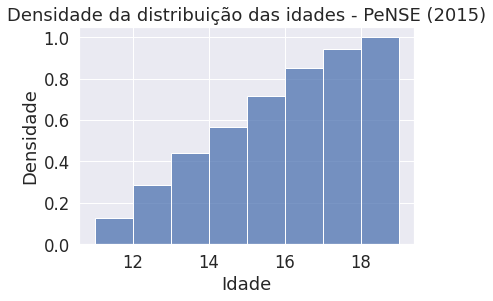

In [ ]:
sns.histplot(x='VB01003', data = dados, stat='density', cumulative=True, bins=8)
plt.title('Densidade da distribuição das idades - PeNSE (2015)')
plt.ylabel('Densidade')
plt.xlabel('Idade')

A distribuicao de frequencia por densidade normaliza a distribuicao a area do grafico, onde e possivel notar a mediana e os quartis por meio doo eixo y, onde 0.2 ou 20% das idades sao menores do que 12 anos.

##Desafio 5.2 - Fazer o cálculo da média por sexo e idade, através do crosstab

In [ ]:
pd.crosstab(columns=dados['VB01001'], index=dados['VB01003'], 
            values=dados['VB17003'], aggfunc='mean')

VB01001,1,2
VB01003,,
11,42.530893,43.310605
12,47.016019,48.472532
13,52.321407,51.624820
14,57.890739,54.237782
15,62.315036,56.203367
16,64.673558,56.952231
17,67.892061,58.133201
18,67.562281,57.694118
19,69.146842,60.507018


Peso dos estudantes por sexo e idade.

##Super-desafio 2.1 - De alguma maniera sumarizar as perguntas para ficar mais curta. NLTK, GESIM...

In [ ]:
perguntas_lista = ['Prezado(a) estudante, você concorda em participar dessa pesquisa?',
             'Qual o grau de escolaridade mais elevado que você pretendo concluir?',
             'Você costuma comer a comida (merenda/almoço) oferecida pela escola? (Não considerar lanches/comida comprados na cantina).',
             'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu pelo menos um tipo de legume ou verdura? Exemplos: alface, abóbora, brócolis, cebola, cenoura, chuchu, couve, espinafre, pepino, tomate etc. Não inclua batata e aipim (mandioca/macaxeira).',
             'Qual é a sua cor ou raça?']

In [ ]:
#Testando novas perguntas por tageamento
def sintetizando_pergunta_lista(perguntas):
  seq = 0
  for i in perguntas:
    palavras = []
    tokens = nltk.word_tokenize(i.capitalize())
    tags = nltk.pos_tag(tokens)
    for i in tags:
      if i[1] in ['NN', 'NNP']:
        palavras.append(i[0])
    perguntas[seq] = '_'.join(palavras[:7]).upper()             
    seq += 1
  return perguntas

In [ ]:
perguntas_lista =  sintetizando_pergunta_lista(perguntas_lista)
perguntas_lista

['PREZADO_ESTUDANTE_CONCORDA_EM_PARTICIPAR_DESSA_PESQUISA',
 'O_GRAU_QUE_PRETENDO_CONCLUIR',
 'VOCÊ_COSTUMA_COMER_COMIDA_MERENDA/ALMOÇO_OFERECIDA_PELA',
 'NOS_COMEU_PELO_TIPO_VERDURA_EXEMPLOS_ALFACE',
 'COR_OU_RAÇA']

In [ ]:
nltk.pos_tag(nltk.word_tokenize('Peso do estudante, incluindo os imputados, com uma casa decimal'))

[('Peso', 'NNP'),
 ('do', 'VBP'),
 ('estudante', 'RB'),
 (',', ','),
 ('incluindo', 'JJ'),
 ('os', 'NN'),
 ('imputados', 'NN'),
 (',', ','),
 ('com', 'NN'),
 ('uma', 'JJ'),
 ('casa', 'NN'),
 ('decimal', 'NN')]

##Super-desafio 2.1 - Criar um dicionário para facilitar a busca da pergunta.

###Solução 1

Solução copiando e colando do excel

In [ ]:
questionario_aluno = {
    
'Região geográfica': ['REGEOGR', {	
1:	'Norte',
2:	'Nordeste',
3:	'Sudeste',
4:	'Sul',
5:	'Centro-Oeste'}],

'Qual é o seu sexo?': ['VB01001', {
1:	'Masculino',
2:	'Feminino'}]}

In [ ]:
questionario_aluno

{'Qual é o seu sexo?': ['VB01001', {1: 'Masculino', 2: 'Feminino'}],
 'Região geográfica': ['REGEOGR',
  {1: 'Norte', 2: 'Nordeste', 3: 'Sudeste', 4: 'Sul', 5: 'Centro-Oeste'}]}

###Solução 2

Solução capturando as informações do DataFrame

####Visualização e definição da lógica de resolução

In [ ]:
questionario_aluno_df.head()

,VARIÁVEL,QUESTIONÁRIO DO ALUNO
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [ ]:
questionario_aluno_df.columns = ['variavel', 'questionario_aluno']

In [ ]:
questionario_aluno_df.head()

,variavel,questionario_aluno
0,ANOPESQ,Ano em que a pesquisa foi realizada
1,PAIS,País
2,76,Brasil
3,REGEOGR,Região geográfica
4,1,Norte


In [ ]:
#Verificacao dos tipos dos dados
questionario_aluno_df.dtypes

variavel              object
questionario_aluno    object
dtype: object

In [ ]:
#Conversao dos tipos para str
questionario_aluno_df = questionario_aluno_df.astype('str')

In [ ]:
questionario_aluno_df.dtypes

variavel              object
questionario_aluno    object
dtype: object

Observações:

No DataFrame o código da pergunta vem antes do texto da pergunta;

O código da pergunta esta com as letras todas em maiúsculo;

O código da pergunta e o número da opção de resposta estão na primeira coluna;

A pergunta e a opção de resposta estão na segunda coluna do Data Frame;

Objetivo: Selecionar as informações do DataFrame e passar para a seguinte estrutura:

dicionario = {
  pergunta: [codigo, {numero: opcao}],
  pergunta: [codigo, {numero: opcao}],
  ...}

Alternativa 1:

Colocar dentro de listas todas as informações do Data Frame para depois reordena-las como no modelo acima.

####Capturando códigos e descrição das perguntas

In [ ]:
#Capturando os codigos das perguntas
codigos_perguntas = []
descricao_perguntas = []
linha = 0

for i in questionario_aluno_df['variavel']:
  if i.isupper():
    codigos_perguntas.append(i)
    questionario_aluno_df['questionario_aluno'][linha] = questionario_aluno_df['questionario_aluno'][linha].upper()
    descricao_perguntas.append(questionario_aluno_df['questionario_aluno'][linha])
  linha += 1  

In [ ]:
codigos_perguntas[:5]

['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001']

In [ ]:
codigos_perguntas[-5:]

['PESO', 'V0006', 'V0007', 'V0008', 'V0041']

In [ ]:
descricao_perguntas[:5]

['ANO EM QUE A PESQUISA FOI REALIZADA',
 'PAÍS',
 'REGIÃO GEOGRÁFICA',
 'PREZADO(A) ESTUDANTE, VOCÊ CONCORDA EM PARTICIPAR DESSA PESQUISA?',
 'QUAL É O SEU SEXO?']

In [ ]:
descricao_perguntas[-5:]

['PESO DO ALUNO DE ACORDO COM A AMOSTRA, UTILIZADO PARA EXPANSÃO',
 'SITUAÇÃO DA ESCOLA',
 'DEPENDÊNCIA ADMINISTRATIVA DA ESCOLA',
 'ESFERA ADMINISTRATIVA DA ESCOLA',
 'TIPO DE ESCOLA PRIVADA']

######Sumarizando perguntas

In [ ]:
descricao_perguntas = sintetizando_pergunta_lista(descricao_perguntas)

In [ ]:
descricao_perguntas

['ANO_PESQUISA_FOI_REALIZADA',
 'PAÍS',
 'REGIÃO_GEOGRÁFICA',
 'PREZADO_ESTUDANTE_CONCORDA_EM_PARTICIPAR_DESSA_PESQUISA',
 'É_O_SEU_SEXO',
 'COR_OU_RAÇA',
 'SUA_IDADE',
 'É_O_MÊS_ANIVERSÁRIO',
 'EM_QUE_ANO_VOCÊ_NASCEU',
 'EM_QUE_ANO/SÉRIE_VOCÊ_ESTÁ',
 'EM_QUE_TURNO_VOCÊ_ESTUDA',
 'VOCÊ_REGIME_MAIS_HORAS_DIÁRIAS_DURANTE_TODO',
 'VOCÊ_REGIME_INTERNATO_ESCOLA_POSSUI_OS_DORMEM',
 'O_GRAU_QUE_PRETENDO_CONCLUIR',
 'QUANDO_TERMINAR_O_CICLO/CURSO_QUE_VOCÊ_FREQUENTANDO',
 'VOCÊ_MÃE',
 'VOCÊ_PAI',
 'CONTANDO_COM_VOCÊ_PESSOAS_MORAM_CASA_APARTAMENTO',
 'NA_SUA_CASA_TEM_TELEFONE_FIXO',
 'VOCÊ_TEM_CELULAR',
 'NA_SUA_CASA_TEM_COMPUTADOR_NETBOOK_LAPTOP',
 'VOCÊ_TEM_ACESSO_À_INTERNET_EM_SUA',
 'ALGUÉM_QUE_MORA_TEM_CARRO',
 'ALGUÉM_QUE_MORA_TEM_MOTO',
 'QUANTOS_COM_CHUVEIRO_TÊM_DENTRO_DA_SUA',
 'TEM_EMPREGADO_DOMÉSTICO_RECEBENDO_DINHEIRO_PARA_FAZER',
 'NÍVEL_GRAU_SUA_MÃE_ESTUDOU_ESTUDA',
 'VOCÊ_TEM_ALGUM_TRABALHO_OU_NEGÓCIO_ATUALMENTE',
 'VOCÊ_RECEBE_DINHEIRO_POR_ESTE_TRABALHO_OU',
 'VOCÊ_COSTUMA_TOMAR_

####Capturando opções de resposta

In [ ]:
opcoes_resposta = []
linha = 0

for i in questionario_aluno_df['variavel']:
  if i.isdigit() or i == '-1' or i == '0 a 2999':
    opcoes_resposta.append(i)
    opcoes_resposta.append(questionario_aluno_df['questionario_aluno'][linha])
  linha += 1

In [ ]:
opcoes_resposta[:5]

['76', 'Brasil', '1', 'Norte', '2']

In [ ]:
opcoes_resposta[-5:]

['Comunitária', '3', 'Confessional', '4', 'Filantrópica']

Converter os digitos para o tipo inteiro

In [ ]:
cont = 0

for i in opcoes_resposta:
  if i.isdigit():
    opcoes_resposta[cont] = int(i)
  cont += 1

In [ ]:
opcoes_resposta[:5]

[76, 'Brasil', 1, 'Norte', 2]

In [ ]:
opcoes_resposta[-5:]

['Comunitária', 3, 'Confessional', 4, 'Filantrópica']

#### Reordenando as informações no dicionário

Modelo: dicionario = {
  pergunta: [codigo, {numero: opcao}],
  pergunta: [codigo, {numero: opcao}],
  ...}

modelo: dicionario_variaveis = {
  descricao_perguntas: [codigos_perguntas, {opcoes_resposta[0]: opcoes_resposta[1]}

Percorrer a primeira coluna do DataFrame com as informações do dicionario de variáveis para selecionar as informações das listas.

#####As três últimas linhas foram ignoradas na captura das listas

In [ ]:
questionario_aluno_df.tail()

,variavel,questionario_aluno
1213,3,Confessional
1214,4,Filantrópica
1215,aluno,contador de aluno
1216,escola,UPA (unidade primária de amostragem)
1217,turma,USA (unidade secundária de amostragem)


##### Dicionário de variáveis

In [ ]:

dicionario_variaveis = {}


item_descricao_pergunta = item_codigo_pergunta = item_opcao_resposta = 0

for i in questionario_aluno_df['variavel'][:-3]:
  if i.isupper():
    dicionario_variaveis[descricao_perguntas[item_descricao_pergunta]] = [codigos_perguntas[item_codigo_pergunta]]
    dicionario_variaveis[descricao_perguntas[item_descricao_pergunta]].append(dict())
    item_descricao_pergunta += 1
    item_codigo_pergunta += 1
  else:
    dicionario_variaveis[descricao_perguntas[item_descricao_pergunta - 1]][1].update({
    opcoes_resposta[item_opcao_resposta]: opcoes_resposta[item_opcao_resposta + 1]})
    item_opcao_resposta += 2

A sumarização das perguntas em alguns casos dificulta o entendimento ou muda o sentido da questão.

In [ ]:
dicionario_variaveis['ALGUM_RESPONSÁVEIS_FUMA']

['VB04006A',
 {'-1': 'Pulo no questionário',
  1: 'Nenhum deles ',
  2: 'Só meu pai ou responsável do sexo masculino ',
  3: 'Só minha mãe ou responsável do sexo feminino ',
  4: 'Meu pai e minha mãe ou responsáveis ',
  5: 'Não sei',
  99: 'Não informado'}]

## Perguntas sumarizadas da pesquisa 

In [ ]:
for i in dicionario_variaveis.keys():
  print(i)

ANO_PESQUISA_FOI_REALIZADA
PAÍS
REGIÃO_GEOGRÁFICA
PREZADO_ESTUDANTE_CONCORDA_EM_PARTICIPAR_DESSA_PESQUISA
É_O_SEU_SEXO
COR_OU_RAÇA
SUA_IDADE
É_O_MÊS_ANIVERSÁRIO
EM_QUE_ANO_VOCÊ_NASCEU
EM_QUE_ANO/SÉRIE_VOCÊ_ESTÁ
EM_QUE_TURNO_VOCÊ_ESTUDA
VOCÊ_REGIME_MAIS_HORAS_DIÁRIAS_DURANTE_TODO
VOCÊ_REGIME_INTERNATO_ESCOLA_POSSUI_OS_DORMEM
O_GRAU_QUE_PRETENDO_CONCLUIR
QUANDO_TERMINAR_O_CICLO/CURSO_QUE_VOCÊ_FREQUENTANDO
VOCÊ_MÃE
VOCÊ_PAI
CONTANDO_COM_VOCÊ_PESSOAS_MORAM_CASA_APARTAMENTO
NA_SUA_CASA_TEM_TELEFONE_FIXO
VOCÊ_TEM_CELULAR
NA_SUA_CASA_TEM_COMPUTADOR_NETBOOK_LAPTOP
VOCÊ_TEM_ACESSO_À_INTERNET_EM_SUA
ALGUÉM_QUE_MORA_TEM_CARRO
ALGUÉM_QUE_MORA_TEM_MOTO
QUANTOS_COM_CHUVEIRO_TÊM_DENTRO_DA_SUA
TEM_EMPREGADO_DOMÉSTICO_RECEBENDO_DINHEIRO_PARA_FAZER
NÍVEL_GRAU_SUA_MÃE_ESTUDOU_ESTUDA
VOCÊ_TEM_ALGUM_TRABALHO_OU_NEGÓCIO_ATUALMENTE
VOCÊ_RECEBE_DINHEIRO_POR_ESTE_TRABALHO_OU
VOCÊ_COSTUMA_TOMAR_O_CAFÉ_DA_MANHÃ
VOCÊ_COSTUMA_ALMOÇAR_JANTAR_COM_SUA_MÃE
VOCÊ_COSTUMA_COMER_QUANDO_ASSISTINDO_À_TV
SUA_COMIDA_ESCOLAR/A

# **6 Intervalo de Confiança e Testes**

## Desafio 6.1: Estudar as medidas de dispersão e calcular utilizando o pandas, realizar os calculas para as outras colunas numéricas.

### 6.1.1 Desvio médio absoluto

Utilizando a função mad() do Pandas

In [ ]:
#Peso medio dos alunos que participaram da pesqua
print(f'Desvio médio absluto do peso: {dados[dicionario_variaveis["PESO_OS_IMPUTADOS_COM_CASA_DECIMAL"][0]].mad():.2f}'
      'Kg')

Desvio médio absluto do peso: 10.99Kg


Como o desvio médio e calculado?

In [ ]:
#Calculo da media de uma variavel
media_peso = dados[dicionario_variaveis["PESO_OS_IMPUTADOS_COM_CASA_DECIMAL"][0]].mean()
media_peso

54.70558105822677

In [ ]:
#Calculo da diferenca do peso com relacao a media amostral
peso = dados[[dicionario_variaveis["PESO_OS_IMPUTADOS_COM_CASA_DECIMAL"][0]]]
peso.columns = ['peso']
peso.head()

,peso
0,37.1
1,50.2
2,48.2
3,69.4
4,78.9


In [ ]:
peso['desvio'] = peso['peso'] - peso['peso'].mean()
peso.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,peso,desvio
0,37.1,-17.605581
1,50.2,-4.505581
2,48.2,-6.505581
3,69.4,14.694419
4,78.9,24.194419


In [ ]:
#Calculando o desvio absluto onde todas as diferencas ficam positivas
peso['|desvio|'] = abs(peso['peso'] - peso['peso'].mean())
peso.head() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,peso,desvio,|desvio|
0,37.1,-17.605581,17.605581
1,50.2,-4.505581,4.505581
2,48.2,-6.505581,6.505581
3,69.4,14.694419,14.694419
4,78.9,24.194419,24.194419


In [ ]:
#Calculando o desvio medio absoluto, media dos desvios absolutos.
print(f'Desvio médio absluto do peso dos alunos: {peso["|desvio|"].mean():.2f}Kg')

Desvio médio absluto do peso dos alunos: 10.99Kg


Passos do cálculo

1 - Calcula se a diferenca absoluta de cada idade para a media da idade

2 - Calcula se a media da diferenca

### 6.1.2 Variância

In [ ]:
#Calcula se o desvio elevado ao quadrado
peso['(variancia^2)'] = peso['desvio'].pow(2)
peso

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,peso,desvio,|desvio|,(variancia^2)
0,37.1,-17.605581,17.605581,309.956484
1,50.2,-4.505581,4.505581,20.300261
2,48.2,-6.505581,6.505581,42.322585
3,69.4,14.694419,14.694419,215.925948
4,78.9,24.194419,24.194419,585.369908
...,...,...,...,...
16551,56.7,1.994419,1.994419,3.977707
16552,61.9,7.194419,7.194419,51.759664
16553,60.9,6.194419,6.194419,38.370826
16554,47.3,-7.405581,7.405581,54.842631


In [ ]:
variancia_peso = peso["(variancia^2)"].sum() / (len(peso) - 1)

In [ ]:
#Calculo da variancia com o fator de correcao de Pearson para variancia amostral
print(f'Variância do peso dos alunos: {variancia_peso}')

Variância do peso dos alunos: 211.6403506076847


A variância retorna um número quadrado para correção das diferenças que retornam resultads negativos.

In [ ]:
#Calculo com a funcao do pandas: var()
peso['peso'].var()

211.64035060768379

### 6.1.3 Desvio Padrão

In [ ]:
print(f'Desvio Padrao do peso: {peso["peso"].std():.2f}Kg')

Desvio Padrao do peso: 14.55Kg


Desvio Padrão

Como o desvio padrão e calculado?

In [ ]:
#O desvio padrao e a raiz quadrada da variancia, ou seja, o desvio padrao e a 
#normalizacao de area para unidade
np.sqrt(variancia_peso)

14.547864125282608

## Desafio 6.2: Ler e pesquisar sobre o intervalo de confiança, nível de confiança e significância.



Intervalo de confianca: Representa a media populacional dentro dentro do intervalo, a assertividade do inteevalo e determinado pelo nivel de confiança.

Nivel de confiança: Significa a porcentagem de acerto dos resultados observados na amostra generalizados para população. O nivel de confianca de 95% significa que os resultados generalizados para a populacao possue 95% de chances de refletir na população.

Nivel de significancia: Significa o erro percentual, quando o nivel de confianca e de 95% de acerto, a significancia sera de 5% de erro.

## Desafio 6.3: Plotar o intervalo de confiança no histograma das alturas.

In [ ]:
intervalo_confianca_altura = zconfint(dados[dicionario_variaveis['ALTURA_OS_IMPUTADOS_COM_CASA_DECIMAL'][0]])
intervalo_confianca_altura

(160.5556082427712, 160.87061789880892)

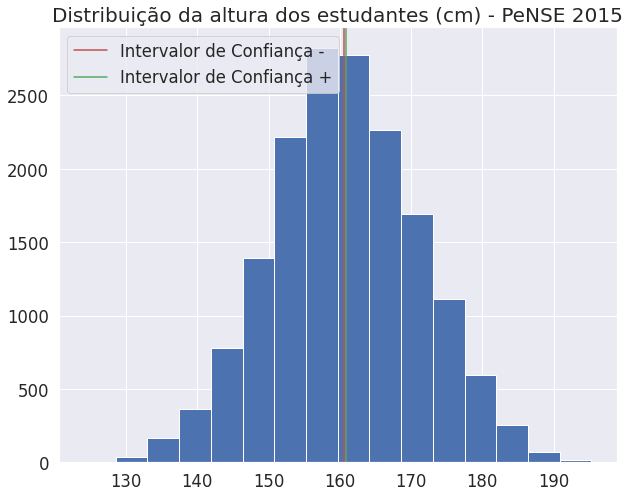

In [ ]:
dados[dicionario_variaveis['ALTURA_OS_IMPUTADOS_COM_CASA_DECIMAL'][0]].hist(bins='sturges',
                                                                            figsize=(10, 8))
plt.title('Distribuição da altura dos estudantes (cm) - PeNSE 2015', fontsize=20)
plt.axvline(intervalo_confianca_altura[0], label='Intervalor de Confiança -',
            color='r')
plt.axvline(intervalo_confianca_altura[1], label='Intervalor de Confiança +',
            color='g')
plt.legend()
plt.show()

A altura apresenta intervalos de confiança muito próximos, pois a significância é de 5% para mais e para menos.

##Desafio 6.4: Realizar os testes de hipóteses de outras informações, explorando e enriquecendo a análise dos dados.

### Idade

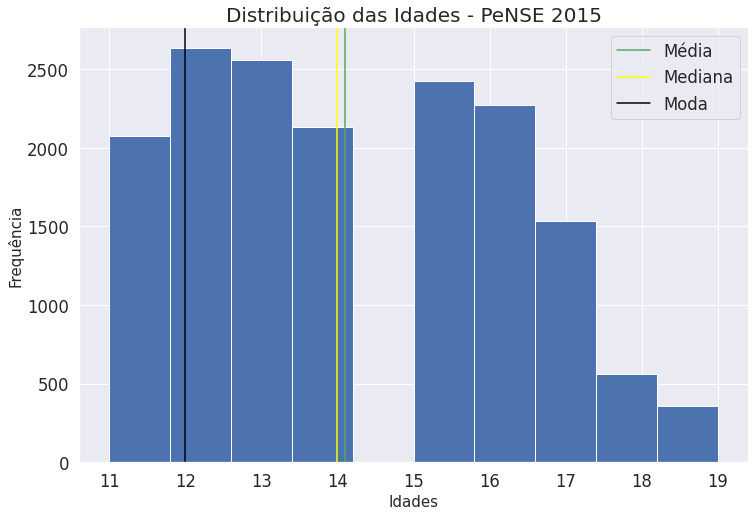

In [ ]:
plt.figure(figsize=(12, 8))
dados[dicionario_variaveis['SUA_IDADE'][0]].hist()
plt.title('Distribuição das Idades - PeNSE 2015', fontsize=20)
plt.axvline(x=dados[dicionario_variaveis['SUA_IDADE'][0]].mean(), label='Média', 
            color='g')
plt.axvline(x=dados[dicionario_variaveis['SUA_IDADE'][0]].median(), label='Mediana', 
            color='yellow')
plt.axvline(x=dados[dicionario_variaveis['SUA_IDADE'][0]].mode()[0], label='Moda', 
            color='black')
plt.legend()
plt.xlabel('Idades', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.show()

Média > Mediana > Moda

In [ ]:
dados[dicionario_variaveis['SUA_IDADE'][0]].mean() > dados[dicionario_variaveis['SUA_IDADE'][0]].median() > dados[dicionario_variaveis['SUA_IDADE'][0]].mode()

0    True
dtype: bool

A distribuição das idades é assimétrica à direita, pois a média é maior do que a mediana que é maior do que a moda.
Visualmente é possível inferir por meio do padrão de alongamento da cauda direita do histograma.

Teste de normalidade da variável idade

In [ ]:
statistic, p_value = normaltest(dados[dicionario_variaveis['SUA_IDADE'][0]])
print('Statistic: ', statistic, '\nP-value:', p_value)

Statistic:  2085.9937490227994 
P-value: 0.0


In [ ]:
p_value < 0.05

True

P-value menor do que 0.05 nega a hipótese nula e confirma a hipótese alternativa, de que a distribuição das idades não é uma distribuição normal.

### Altura

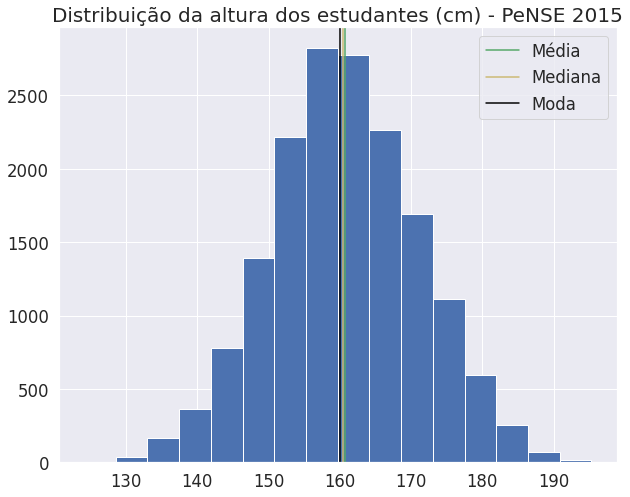

In [ ]:
dados[dicionario_variaveis['ALTURA_OS_IMPUTADOS_COM_CASA_DECIMAL'][0]].hist(bins='sturges',
                                                                            figsize=(10, 8))
plt.title('Distribuição da altura dos estudantes (cm) - PeNSE 2015', fontsize=20)
plt.axvline(x=dados[dicionario_variaveis['ALTURA_OS_IMPUTADOS_COM_CASA_DECIMAL'][0]].mean(),
            color='g', label='Média')
plt.axvline(x=dados[dicionario_variaveis['ALTURA_OS_IMPUTADOS_COM_CASA_DECIMAL'][0]].median(),
            color='y', label='Mediana')
plt.axvline(x=dados[dicionario_variaveis['ALTURA_OS_IMPUTADOS_COM_CASA_DECIMAL'][0]].mode()[0],
            color='black', label='Moda')
plt.legend()
plt.show()

Com base na visualização do histograma a distribuição das alturas segue uma distribuição normal.

Média == Mediana == Moda

In [ ]:
dados[dicionario_variaveis['ALTURA_OS_IMPUTADOS_COM_CASA_DECIMAL'][0]].mean() == dados[dicionario_variaveis['ALTURA_OS_IMPUTADOS_COM_CASA_DECIMAL'][0]].median() == dados[dicionario_variaveis['ALTURA_OS_IMPUTADOS_COM_CASA_DECIMAL'][0]].mode() 

False

P-value > 0.05

In [ ]:
statistic, p_value = normaltest(dados[dicionario_variaveis['ALTURA_OS_IMPUTADOS_COM_CASA_DECIMAL'][0]])
print(f'Statistic: {statistic}\nP-value: {p_value:.2f}')

Statistic: 25.933097494956645
P-value: 0.00


In [ ]:
p_value > 0.05

False

O p-value da distribuição das alturas não é maior do que 0.05, logo a distribuição não é uma normal.

### IMC e satisfação com a auto-imagem

In [ ]:
#Alterando os valores da pergunta relacionada a auto imagem
dados[dicionario_variaveis['COMO_VOCÊ_SE_SENTE_RELAÇÃO_AO_SEU'][0]] = dados[dicionario_variaveis['COMO_VOCÊ_SE_SENTE_RELAÇÃO_AO_SEU'][0]].map(dicionario_variaveis['COMO_VOCÊ_SE_SENTE_RELAÇÃO_AO_SEU'][1])

In [ ]:
#Percentual de satisfação pelo índice
pd.crosstab(index=dados['VB11007'], columns=dados['VB01001'], 
            normalize='index', colnames=['Sexo'],
            rownames=['Como se sente com relação ao seu corpo?']) * 100

Sexo,Feminino,Masculino
Como se sente com relação ao seu corpo?,,
Indiferente,47.426674,52.573326
Insatisfeito(a),66.208083,33.791917
Muito insatisfeito(a),63.585434,36.414566
Muito satisfeito(a),41.796875,58.203125
Não informado,34.254144,65.745856
Satisfeito(a),49.566474,50.433526


As pessoas de sexo masculino apresentam maiores índices de satisfação (muito satisfeito, safisfeito) enquanto que as pessoas do sexo feminino apresentam maiores índices de insatisfação (insatisfeito, muito insatisfeito).

In [ ]:
#Percentual de satisfação pela coluna
pd.crosstab(index=dados['VB11007'], columns=dados['VB01001'], 
            normalize='columns', colnames=['Sexo'],
            rownames=['Como se sente com relação ao seu corpo?']) * 100

Sexo,Feminino,Masculino
Como se sente com relação ao seu corpo?,,
Indiferente,10.364010,11.463738
Insatisfeito(a),18.623776,9.484735
Muito insatisfeito(a),5.490386,3.137444
Muito satisfeito(a),23.291813,32.363944
Não informado,0.749788,1.435984
Satisfeito(a),41.480227,42.114155


In [ ]:
print('Como se sente com relação ao seu corpo?')
print(f'Homens satisfeitos e muito satisfeitos: {32.36 + 42.11}%')
print(f'Mulheres satisfeitas e muito satisfeitas: {23.29 + 41.48}%')
print(f'Homens insatisfeitos e muito insatisfeitos: {9.48 + 3.13}%')
print(f'Mulheres insatisfeitas e muito insatisfeitas: {18.62 + 5.49}%')

Como se sente com relação ao seu corpo?
Homens satisfeitos e muito satisfeitos: 74.47%
Mulheres satisfeitas e muito satisfeitas: 64.77%
Homens insatisfeitos e muito insatisfeitos: 12.61%
Mulheres insatisfeitas e muito insatisfeitas: 24.11%


In [ ]:
#Média do IMC por sexo/ satisfação
pd.crosstab(index=dados['VB11007'], columns=dados['VB01001'], 
            values=dados['imc'], aggfunc='mean', colnames=['Sexo'],
            rownames=['Como se sente com relação ao seu corpo?'])

Sexo,Feminino,Masculino
Como se sente com relação ao seu corpo?,,
Indiferente,21.944691,21.942895
Insatisfeito(a),22.659597,23.029555
Muito insatisfeito(a),23.541828,22.481808
Muito satisfeito(a),19.860369,19.851823
Não informado,20.772419,20.490840
Satisfeito(a),20.549201,20.658519


Em média o IMC não influencia na autoimagem do estudante, visto que para todas as respostas de satisfação a média do IMC é normal.

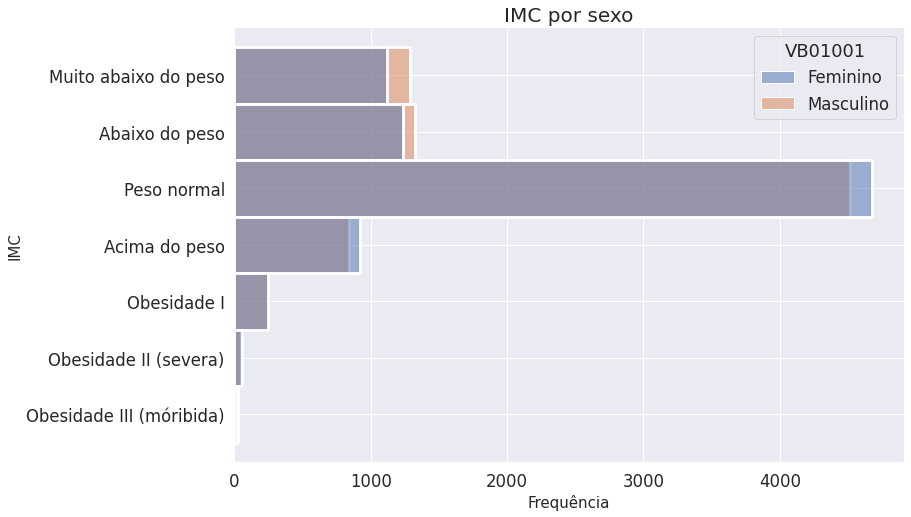

In [ ]:
ax = sns.histplot(data=dados, y='classificacao_imc', hue='VB01001')
ax.figure.set_size_inches(12, 8)
ax.set_ylabel('IMC', fontsize=15)
ax.set_xlabel('Frequência', fontsize=15)
ax.set_title('IMC por sexo', fontsize=20);

In [ ]:
pd.crosstab(index=dados['VB01001'], columns=dados['classificacao_imc'], 
            normalize='index') * 100

classificacao_imc,Muito abaixo do peso,Abaixo do peso,Peso normal,Acima do peso,Obesidade I,Obesidade II (severa),Obesidade III (móribida)
VB01001,,,,,,,
Feminino,13.532471,14.923207,56.548555,11.162172,2.950780,0.677228,0.205587
Masculino,15.566550,15.988898,54.494992,10.124291,2.956438,0.567153,0.301677


In [ ]:
print(f'Homens acima do peso (Acima do peso, obesidde I, II e II): {10.12 + 2.95 + 0.56 + 0.30:.2f}%')
print(f'Mulheres acima do peso (Acima do peso, obesidde I, II e II): {11.16 + 2.95 + 0.67 + 0.20:.2f}%')

Homens acima do peso (Acima do peso, obesidde I, II e II): 13.93%
Mulheres acima do peso (Acima do peso, obesidde I, II e II): 14.98%


Enquanto que a difernça de pessoas do sexo feminino que estão acima do peso para as pessoas do sexo masculino é de aproximadamente 1% a mais as pessoas do sexo feminino estão mais insatisfeitas com o próprio corpo, uma hipótese é a de que as mulheres são pressionadas principalmente pela indústria da moda e da propaganda a seguir um padrão de beleza que pode ser a causa da insfatisfação para 24,11% das adolescentes. 
A hipótese para ser validade requer pesquisas relacionadas a essa questão social.

In [ ]:
#Alterando os valores da coluna sexo
dados[dicionario_variaveis['É_O_SEU_SEXO'][0]] = dados[dicionario_variaveis['É_O_SEU_SEXO'][0]].map(dicionario_variaveis['É_O_SEU_SEXO'][1])

0     Feminino
1     Feminino
2    Masculino
3    Masculino
4    Masculino
Name: VB01001, dtype: object

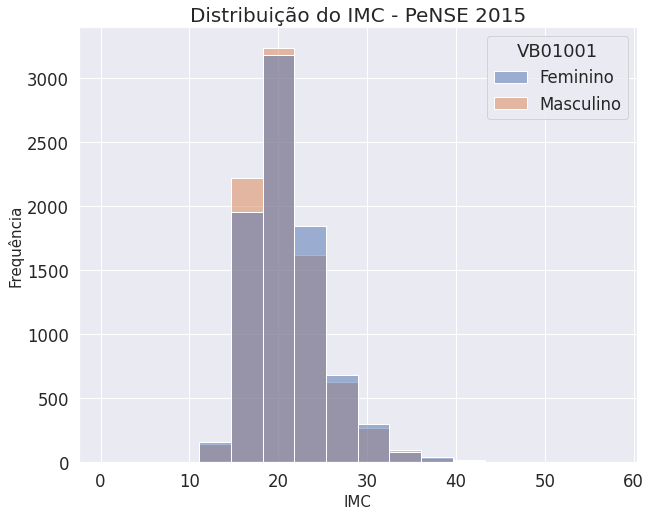

In [ ]:
ax = sns.histplot(data=dados, x='imc', hue='VB01001', bins='sturges')
ax.figure.set_size_inches(10, 8)
ax.set_title('Distribuição do IMC - PeNSE 2015', fontsize=20)
ax.set_xlabel('IMC', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15);

Visualmete a distribuição de frequência do IMC é assimétrica à direita.

In [ ]:
_, p_value = normaltest(dados['imc'])
print('P-value é maior do que 0.05?', p_value > 0.05)

P-value é maior do que 0.05? False


Por meio do normaltest é possível confirmar a hipótese alternativa, onde a distribuição do IMC não é simétrica.


---


A distribuição do IMC parece ser a mesma para ambos os sexos.

In [ ]:
imc_feminino = dados.query('VB01001 == "Feminino"')['imc']
imc_masculino = dados.query('VB01001 == "Masculino"')['imc']

In [ ]:
statisticc, p_value = ranksums(imc_feminino, imc_masculino)
print(f'P-value: {p_value:.2f}')

P-value: 0.00


In [ ]:
p_value < 0.05

True

Por meio do teste estatístico não paramétrico ranksums é possível comprovar que as distribuições do imc do sexo feminino e masculino são diferentes.



---

